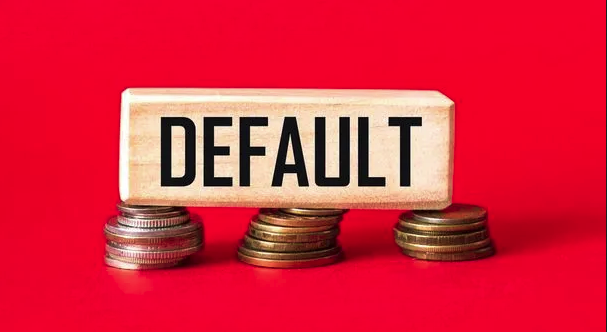

# Overview

-Create a model to best predict which clients in the dataset have defaulted & predict who will default on a loan. 
 
- Test sample 2019 loan dataset from Kaggle. 
- From the sample dataset the team used the  k nearest, logistic regression & decision tree models to get the best results on predictions and scored a 65% on accuracy with the decision tree model. 
- Recommended to utilize more numericial and non-numerical categories in the dataset to improve the scores.

# Business Problem

Albeit the rigorous loan approval process, many loans still default at the cost of profit and risk to banks globally.

# Data Understanding

## Data Preparation
We first looked at all of the the numerical categories that reflect the history of the client vs the details of the property and evaluate who defualted across the dataset. We used different visualizations like historgrams and scatter plots to check for trend and correlating information. We chose not to impute in any columns to avoid any bias that could be inserted into the dataset.


## Questions to consider:
-Where did the data come from, and how do they relate to the data analysis questions?
-What do the data represent? Who is in the sample and what variables are included?
-What is the target variable?
-What are the properties of the variables you intend to use?

## Primary Variables/Features used? 
-loan_limit' 
-'approv_in_adv', 
-'loan_type', 
-'loan_purpose',
-'Credit_Worthiness', 
-'open_credit', 
-'business_or_commercial',
-'loan_amount', 
-'term', 
-'Neg_ammortization', 
-'interest_only',
-'lump_sum_payment', 
-'property_value', 
-'occupancy_type', 
-'total_units',
-'income', 
-'Credit_Score', 
-'age', 
-'submission_of_application', 
-'LTV',
-'Region', 
-'dtir1'
## Variables not used?
-Upfront_charges
-rate_of_interest
-Interest_rate_spread  

## Modeling Used
Used Decisicion Tree, K-Nearest, Logistic Regression.

In [1]:
# imports
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
C:\Users\sunny\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\sunny\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
to_drop=['Interest_rate_spread','rate_of_interest','Upfront_charges'] 
# dropping columns with due to limitation of data availibility based on EDA 

In [3]:
df=pd.read_csv('data/cleaned.csv',index_col=0)
y=df['Status']
df=df.drop(columns=['Status'])
features=df.drop(columns=to_drop)
numeric=['int64','float64']
baseline_num_features=features.select_dtypes(include=numeric)

In [4]:
baseline_num_features

,loan_amount,term,property_value,income,Credit_Score,LTV,dtir1
0,116500,360.0,118000.0,1740.0,758,98.728814,45.0
2,406500,360.0,508000.0,9480.0,834,80.019685,46.0
3,456500,360.0,658000.0,11880.0,587,69.376900,42.0
4,696500,360.0,758000.0,10440.0,602,91.886544,39.0
5,706500,360.0,1008000.0,10080.0,864,70.089286,40.0
...,...,...,...,...,...,...,...
148665,436500,180.0,608000.0,7860.0,659,71.792763,48.0
148666,586500,360.0,788000.0,7140.0,569,74.428934,15.0
148667,446500,180.0,728000.0,6900.0,702,61.332418,49.0
148668,196500,180.0,278000.0,7140.0,737,70.683453,29.0


In [5]:
features.columns

Index(['loan_limit', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'occupancy_type', 'total_units',
       'income', 'Credit_Score', 'age', 'submission_of_application', 'LTV',
       'Region', 'dtir1'],
      dtype='object')

In [6]:
baseline_cat_features=['business_or_commercial','Neg_ammortization','lump_sum_payment','interest_only']
bl_cat_features=features[baseline_cat_features]
bl_cat_features

,business_or_commercial,Neg_ammortization,lump_sum_payment,interest_only
0,nob/c,not_neg,not_lpsm,not_int
2,nob/c,neg_amm,not_lpsm,not_int
3,nob/c,not_neg,not_lpsm,not_int
4,nob/c,not_neg,not_lpsm,not_int
5,nob/c,not_neg,not_lpsm,not_int
...,...,...,...,...
148665,nob/c,not_neg,not_lpsm,not_int
148666,nob/c,not_neg,not_lpsm,not_int
148667,nob/c,not_neg,not_lpsm,not_int
148668,nob/c,not_neg,not_lpsm,not_int


In [7]:
ohc = OneHotEncoder(drop = 'first',sparse=False)
ohc.fit_transform(bl_cat_features)

array([[1., 1., 1., 1.],
       [1., 0., 1., 1.],
       [1., 1., 1., 1.],
       ...,
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [8]:
ohc.get_feature_names()

array(['x0_nob/c', 'x1_not_neg', 'x2_not_lpsm', 'x3_not_int'],
      dtype=object)

In [9]:
bl_ohc_features=pd.DataFrame(ohc.fit_transform(bl_cat_features),columns=ohc.get_feature_names(),index=bl_cat_features.index)
bl_ohc_features

,x0_nob/c,x1_not_neg,x2_not_lpsm,x3_not_int
0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
...,...,...,...,...
148665,1.0,1.0,1.0,1.0
148666,1.0,1.0,1.0,1.0
148667,1.0,1.0,1.0,1.0
148668,1.0,1.0,1.0,1.0


In [10]:
X=pd.concat([baseline_num_features,bl_ohc_features],axis=1)
X

,loan_amount,term,property_value,income,Credit_Score,LTV,dtir1,x0_nob/c,x1_not_neg,x2_not_lpsm,x3_not_int
0,116500,360.0,118000.0,1740.0,758,98.728814,45.0,1.0,1.0,1.0,1.0
2,406500,360.0,508000.0,9480.0,834,80.019685,46.0,1.0,0.0,1.0,1.0
3,456500,360.0,658000.0,11880.0,587,69.376900,42.0,1.0,1.0,1.0,1.0
4,696500,360.0,758000.0,10440.0,602,91.886544,39.0,1.0,1.0,1.0,1.0
5,706500,360.0,1008000.0,10080.0,864,70.089286,40.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
148665,436500,180.0,608000.0,7860.0,659,71.792763,48.0,1.0,1.0,1.0,1.0
148666,586500,360.0,788000.0,7140.0,569,74.428934,15.0,1.0,1.0,1.0,1.0
148667,446500,180.0,728000.0,6900.0,702,61.332418,49.0,1.0,1.0,1.0,1.0
148668,196500,180.0,278000.0,7140.0,737,70.683453,29.0,1.0,1.0,1.0,1.0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
X_train.shape, X_test.shape

((84368, 11), (36158, 11))

In [12]:
num_features_list=['loan_amount','term','property_value','income','Credit_Score','LTV','dtir1']
cat_features_list=['x0_nob/c','x1_not_neg','x2_not_lpsm','x3_not_int']
X_train_num=X_train[num_features_list]
X_test_num=X_test[num_features_list]
sc=StandardScaler()
X_train_num_sc=sc.fit_transform(X_train_num)
X_test_num_sc=sc.transform(X_test_num)

In [13]:
X_train_num_sc

array([[ 0.80505868,  0.4396436 ,  0.55248121, ..., -0.59260334,
        -0.2238071 ,  0.68751841],
       [ 0.53184194,  0.4396436 , -0.06864887, ...,  1.5278651 ,
         0.93811458,  0.68751841],
       [ 1.18756213,  0.4396436 ,  0.55248121, ...,  0.84690166,
         0.30018912, -0.16567932],
       ...,
       [-1.21674523, -2.56029314,  1.038583  , ..., -1.36838447,
        -3.15510064, -2.25127377],
       [ 0.80505868,  0.4396436 ,  0.79553211, ...,  0.06250073,
        -0.62609099, -1.58767554],
       [-0.83424179,  0.4396436 , -0.55475067, ...,  1.51062552,
        -0.6517206 , -3.1044715 ]])

In [14]:
X_train_num_sc=pd.DataFrame(X_train_num_sc,columns=X_train_num.columns,index=X_train_num.index)
X_train_sc=pd.concat([X_train_num_sc,X_train[cat_features_list]],axis=1)
X_test_num_sc=pd.DataFrame(X_test_num_sc,columns=X_test_num.columns,index=X_test_num.index)
X_test_sc=pd.concat([X_test_num_sc,X_test[cat_features_list]],axis=1)

In [15]:
X_test_sc

,loan_amount,term,property_value,income,Credit_Score,LTV,dtir1,x0_nob/c,x1_not_neg,x2_not_lpsm,x3_not_int
67115,-0.451738,0.439644,0.012368,-0.145605,1.269271,-1.219046,-1.872075,1.0,1.0,1.0,1.0
75261,-0.888885,0.439644,-0.878819,-0.587999,1.717500,1.166717,-0.070880,1.0,0.0,1.0,1.0
60397,-0.561025,-0.160344,-0.527745,-0.537727,1.148594,0.106729,0.592719,1.0,0.0,1.0,1.0
24636,-0.888885,0.439644,-0.770796,0.588369,-0.713280,0.257095,-0.070880,1.0,1.0,1.0,1.0
143126,-1.489962,0.439644,-1.148875,-0.678489,0.648646,0.048268,-0.165679,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10600,-0.451738,0.439644,-0.635768,-0.014897,-0.239192,1.083949,2.014715,0.0,1.0,1.0,1.0
63493,0.750415,0.439644,0.444459,0.337008,-1.377004,-0.089558,0.213520,1.0,0.0,1.0,1.0
116294,-0.397095,0.439644,-0.176671,-0.537727,-0.790859,-0.687046,0.592719,1.0,1.0,1.0,0.0
103494,-0.342452,0.439644,-0.608762,-0.648326,-1.532160,1.289885,0.877118,0.0,1.0,1.0,1.0


# Baseline model - Logistic Regression with basic set of features: 
Loan Amount, Term, Income, Property Value, Credit Score, LRV, DTIR, Business/Commercial, Negative amortization, Lump-sum payment, Interest-only

In [16]:
lr=LogisticRegression(random_state=42)

In [17]:
lr.fit(X_train_sc,y_train)
y_train_pred=lr.predict(X_train_sc)

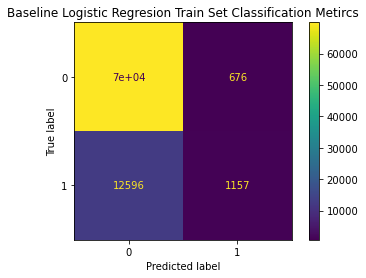

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     70615
           1       0.63      0.08      0.15     13753

    accuracy                           0.84     84368
   macro avg       0.74      0.54      0.53     84368
weighted avg       0.81      0.84      0.79     84368



In [18]:
plot_confusion_matrix(lr,X_train_sc,y_train)
plt.title('Baseline Logistic Regresion Train Set Classification Metircs')
plt.show()
print(classification_report(y_train,lr.predict(X_train_sc)))

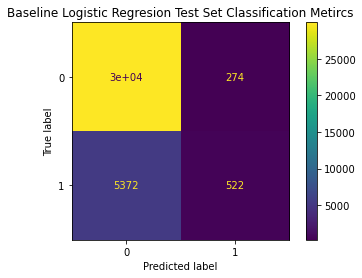

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     30264
           1       0.66      0.09      0.16      5894

    accuracy                           0.84     36158
   macro avg       0.75      0.54      0.54     36158
weighted avg       0.82      0.84      0.79     36158



In [19]:
plot_confusion_matrix(lr,X_test_sc,y_test)
plt.title('Baseline Logistic Regresion Test Set Classification Metircs')
plt.show()
print(classification_report(y_test,lr.predict(X_test_sc)))

Scrores demonstrates class imbalance issues, tuning model with balanced class weights

## Logistic Regression Iteration 1 - balanced class weights

In [20]:
lr1=LogisticRegression(C=1,random_state=42,class_weight='balanced')
lr1.fit(X_train_sc,y_train)
y_train_pred=lr1.predict(X_train_sc)
y_test_pred=lr1.predict(X_test_sc)

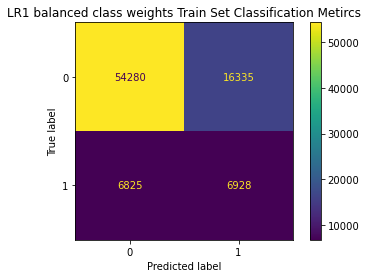

              precision    recall  f1-score   support

           0       0.89      0.77      0.82     70615
           1       0.30      0.50      0.37     13753

    accuracy                           0.73     84368
   macro avg       0.59      0.64      0.60     84368
weighted avg       0.79      0.73      0.75     84368



In [21]:
plot_confusion_matrix(lr1,X_train_sc,y_train)
plt.title('LR1 balanced class weights Train Set Classification Metircs')
plt.show()
print(classification_report(y_train,lr1.predict(X_train_sc)))

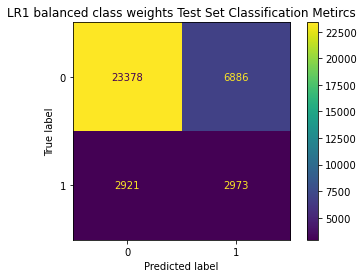

              precision    recall  f1-score   support

           0       0.89      0.77      0.83     30264
           1       0.30      0.50      0.38      5894

    accuracy                           0.73     36158
   macro avg       0.60      0.64      0.60     36158
weighted avg       0.79      0.73      0.75     36158



In [22]:
plot_confusion_matrix(lr1,X_test_sc,y_test)
plt.title('LR1 balanced class weights Test Set Classification Metircs')
plt.show()
print(classification_report(y_test,lr1.predict(X_test_sc)))

#### Iteration Summary: balanced class weights alredy improved model performance, using SMOTE in next iteration

## Logistic Regression Iteration 2  - Using SMOTE Strategy

In [24]:
print(y.value_counts(normalize=True))
print(f'current ratio: {y.value_counts()[1]/y.value_counts()[0]}')

0    0.83699
1    0.16301
Name: Status, dtype: float64
current ratio: 0.19475807650749907


In [119]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=1,random_state=9)
X_train_resam,y_train_resam=smote.fit_resample(X_train_sc,y_train)

In [26]:
y_train.value_counts(normalize=True)

0    0.836988
1    0.163012
Name: Status, dtype: float64

In [27]:
y_train_resam.value_counts(normalize=True)

0    0.5
1    0.5
Name: Status, dtype: float64

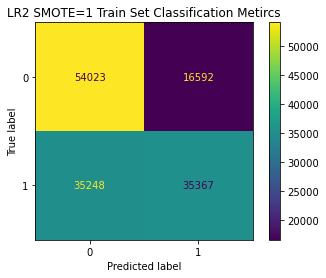

              precision    recall  f1-score   support

           0       0.61      0.77      0.68     70615
           1       0.68      0.50      0.58     70615

    accuracy                           0.63    141230
   macro avg       0.64      0.63      0.63    141230
weighted avg       0.64      0.63      0.63    141230



In [28]:
lr2=LogisticRegression(C=1,random_state=42)
lr2.fit(X_train_resam,y_train_resam)
plot_confusion_matrix(lr2,X_train_resam,y_train_resam)
plt.title('LR2 SMOTE=1 Train Set Classification Metircs')
plt.show()
print(classification_report(y_train_resam,lr2.predict(X_train_resam)))

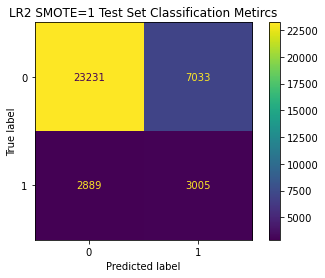

              precision    recall  f1-score   support

           0       0.89      0.77      0.82     30264
           1       0.30      0.51      0.38      5894

    accuracy                           0.73     36158
   macro avg       0.59      0.64      0.60     36158
weighted avg       0.79      0.73      0.75     36158



In [29]:
plot_confusion_matrix(lr2,X_test_sc,y_test)
plt.title('LR2 SMOTE=1 Test Set Classification Metircs')
plt.show()
print(classification_report(y_test,lr2.predict(X_test_sc)))

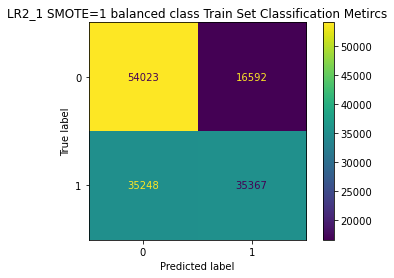

              precision    recall  f1-score   support

           0       0.61      0.77      0.68     70615
           1       0.68      0.50      0.58     70615

    accuracy                           0.63    141230
   macro avg       0.64      0.63      0.63    141230
weighted avg       0.64      0.63      0.63    141230



In [30]:
lr2_1=LogisticRegression(C=1,random_state=42,class_weight='balanced')
lr2_1.fit(X_train_resam,y_train_resam)
plot_confusion_matrix(lr2_1,X_train_resam,y_train_resam)
plt.title('LR2_1 SMOTE=1 balanced class Train Set Classification Metircs')
plt.show()
print(classification_report(y_train_resam,lr2_1.predict(X_train_resam)))

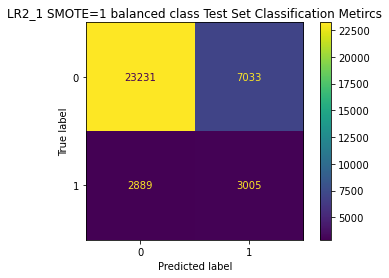

              precision    recall  f1-score   support

           0       0.89      0.77      0.82     30264
           1       0.30      0.51      0.38      5894

    accuracy                           0.73     36158
   macro avg       0.59      0.64      0.60     36158
weighted avg       0.79      0.73      0.75     36158



In [31]:
plot_confusion_matrix(lr2_1,X_test_sc,y_test)
plt.title('LR2_1 SMOTE=1 balanced class Test Set Classification Metircs')
plt.show()
print(classification_report(y_test,lr2_1.predict(X_test_sc)))

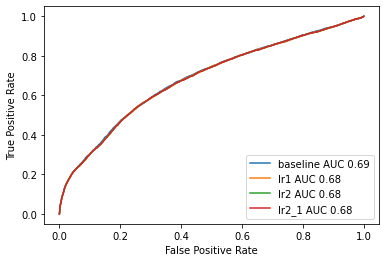

In [32]:
#plotting roc curves of different logistic Regression models so far addressing class imbalance vs not,  
#though there is no apparent differences in ROC/AUC score, recall score improved, which is not reflected in ROC/AUC
f, ax=plt.subplots()
plot_roc_curve(lr,X_test_sc,y_test,ax=ax,label=f"baseline AUC {roc_auc_score(y_test,lr.predict_proba(X_test_sc)[:,1]):.2f}")
plot_roc_curve(lr1,X_test_sc,y_test,ax=ax,label=f"lr1 AUC {roc_auc_score(y_test,lr1.predict_proba(X_test_sc)[:,1]):.2f}")
plot_roc_curve(lr2,X_test_sc,y_test,ax=ax,label=f"lr2 AUC {roc_auc_score(y_test,lr2.predict_proba(X_test_sc)[:,1]):.2f}")
plot_roc_curve(lr2_1,X_test_sc,y_test,ax=ax,label=f"lr2_1 AUC {roc_auc_score(y_test,lr2_1.predict_proba(X_test_sc)[:,1]):.2f}")

ratio 0.20 recall score 0.09 accuray score 0.84  f1 score 0.16
ratio 0.30 recall score 0.12 accuray score 0.84  f1 score 0.20
ratio 0.40 recall score 0.17 accuray score 0.84  f1 score 0.25
ratio 0.50 recall score 0.25 accuray score 0.82  f1 score 0.31
ratio 0.60 recall score 0.32 accuray score 0.80  f1 score 0.34
ratio 0.70 recall score 0.37 accuray score 0.78  f1 score 0.35
ratio 0.80 recall score 0.41 accuray score 0.76  f1 score 0.36
ratio 0.90 recall score 0.46 accuray score 0.75  f1 score 0.37
ratio 1.00 recall score 0.51 accuray score 0.72  f1 score 0.38


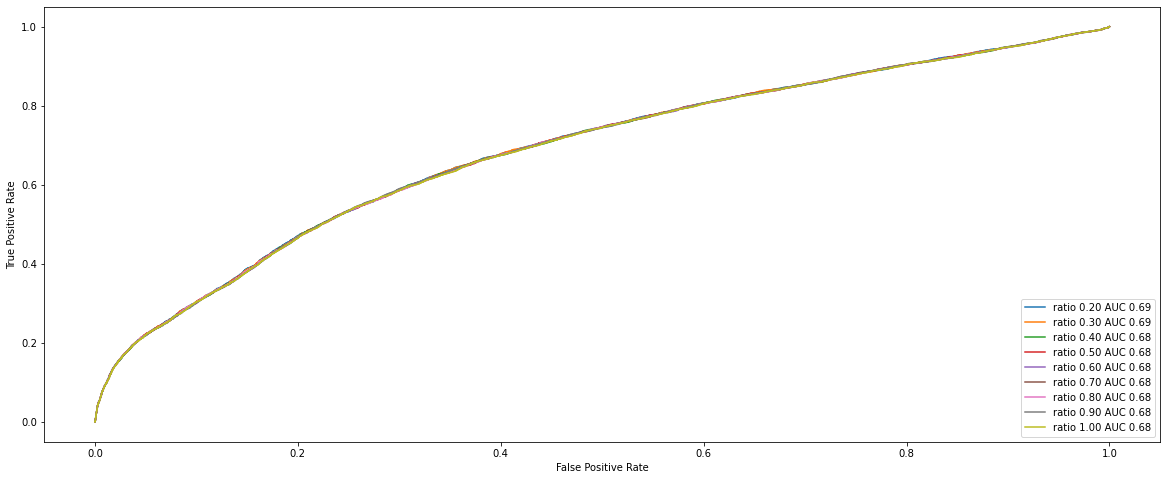

In [33]:
#trying out different SMOTE strategy for LR2, best recall score is equal sampling
f, ax=plt.subplots(figsize=(20,8))
for ratio in np.linspace(0.2,1,9):
    smote=SMOTE(sampling_strategy=ratio)
    X_train_resam,y_train_resam=smote.fit_resample(X_train_sc,y_train)
    lr2_2=LogisticRegression(C=1,random_state=42)
    lr2_2.fit(X_train_resam,y_train_resam)
    plot_roc_curve(lr2_2,X_test_sc,y_test,ax=ax,label=f"ratio {ratio:.2f} AUC {roc_auc_score(y_test,lr2_2.predict_proba(X_test_sc)[:,1]):.2f}")
    print(f"ratio {ratio:.2f} recall score {recall_score(y_test,lr2_2.predict(X_test_sc)):.2f} accuray score {accuracy_score(y_test,lr2_2.predict(X_test_sc)):.2f}  f1 score {f1_score(y_test,lr2_2.predict(X_test_sc)):.2f}")

#### Logistic Regression Iteration 1 & 2 Summary: both methods address class imbalance sufficiently, SMOTE = 1 appears to be the best strategy so will implement this further

## Logistic Regression Iteration 3 SMOTE and More Catagorical Features

In [34]:
add_cat_features=['loan_limit','approv_in_adv','loan_type','loan_purpose','Credit_Worthiness','open_credit','occupancy_type','total_units','age','Region']
add_features=features[add_cat_features]
ohc_1 = OneHotEncoder(drop = 'first',sparse=False)
add_ohc_features=pd.DataFrame(ohc_1.fit_transform(add_features),columns=ohc_1.get_feature_names(),index=add_features.index)

In [35]:
X0=pd.concat([X,add_ohc_features],axis=1)
X0

,loan_amount,term,property_value,income,Credit_Score,LTV,dtir1,x0_nob/c,x1_not_neg,x2_not_lpsm,...,x7_4U,x8_35-44,x8_45-54,x8_55-64,x8_65-74,x8_<25,x8_>74,x9_North-East,x9_central,x9_south
0,116500,360.0,118000.0,1740.0,758,98.728814,45.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,406500,360.0,508000.0,9480.0,834,80.019685,46.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,456500,360.0,658000.0,11880.0,587,69.376900,42.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,696500,360.0,758000.0,10440.0,602,91.886544,39.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,706500,360.0,1008000.0,10080.0,864,70.089286,40.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,436500,180.0,608000.0,7860.0,659,71.792763,48.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
148666,586500,360.0,788000.0,7140.0,569,74.428934,15.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
148667,446500,180.0,728000.0,6900.0,702,61.332418,49.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148668,196500,180.0,278000.0,7140.0,737,70.683453,29.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y, test_size=0.3, random_state=42,stratify=y)
X0_train.shape, X0_test.shape

((84368, 34), (36158, 34))

In [37]:
new_cat_features_list=cat_features_list+list(ohc_1.get_feature_names())
X0_train_num=X0_train[num_features_list]
X0_test_num=X0_test[num_features_list]
sc0=StandardScaler()
X0_train_num_sc=sc0.fit_transform(X0_train_num)
X0_test_num_sc=sc0.transform(X0_test_num)
X0_train_num_sc=pd.DataFrame(X0_train_num_sc,columns=X0_train_num.columns,index=X0_train_num.index)
X0_train_sc=pd.concat([X0_train_num_sc,X0_train[new_cat_features_list]],axis=1)
X0_test_num_sc=pd.DataFrame(X0_test_num_sc,columns=X0_test_num.columns,index=X0_test_num.index)
X0_test_sc=pd.concat([X0_test_num_sc,X0_test[new_cat_features_list]],axis=1)

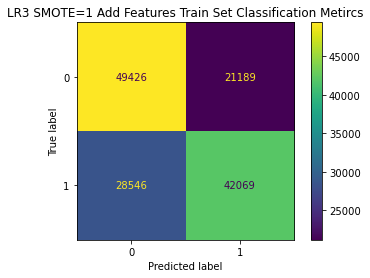

              precision    recall  f1-score   support

           0       0.63      0.70      0.67     70615
           1       0.67      0.60      0.63     70615

    accuracy                           0.65    141230
   macro avg       0.65      0.65      0.65    141230
weighted avg       0.65      0.65      0.65    141230



In [38]:
smote0=SMOTE(sampling_strategy=1)
X0_train_resam,y0_train_resam=smote.fit_resample(X0_train_sc,y0_train)
lr3=LogisticRegression(C=1,random_state=42)
lr3.fit(X0_train_resam,y0_train_resam)
plot_confusion_matrix(lr3,X0_train_resam,y0_train_resam)
plt.title('LR3 SMOTE=1 Add Features Train Set Classification Metircs')
plt.show()
print(classification_report(y0_train_resam,lr3.predict(X0_train_resam)))

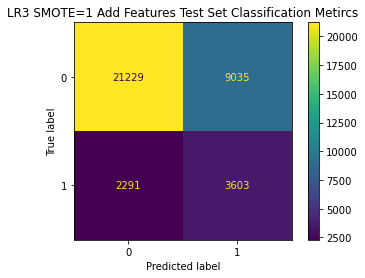

              precision    recall  f1-score   support

           0       0.90      0.70      0.79     30264
           1       0.29      0.61      0.39      5894

    accuracy                           0.69     36158
   macro avg       0.59      0.66      0.59     36158
weighted avg       0.80      0.69      0.72     36158



In [39]:
plot_confusion_matrix(lr3,X0_test_sc,y0_test)
plt.title('LR3 SMOTE=1 Add Features Test Set Classification Metircs')
plt.show()
print(classification_report(y0_test,lr3.predict(X0_test_sc)))

#### Logistic Regression Iteration 3 Summary: adding more features appear to have improved model performance by ~0.1 in recall score. Since we have not regularized the model yet using C hyperparameter, and the regularization result may be affected by the amount of features included, we will try both basic features and added features for further tuning. 

## Logistic Regression Iteration 4 Regularization Tuning C

cross-validate on recall score using GridSearchCV, first for basic feature model, then for added feature model

In [40]:
from sklearn.model_selection import GridSearchCV
params={'C':[1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,0.1,1,10,1e+2,1e+3,1e+4]}
clf=GridSearchCV(lr2,params,scoring='recall')
clf.fit(X_train_resam,y_train_resam)
clf.cv_results_

{'mean_fit_time': array([0.06741052, 0.06299343, 0.12219124, 0.12713022, 0.16579485,
        0.36295714, 0.4192564 , 0.45202656, 0.45091987, 0.4651248 ,
        0.4602788 , 0.42777109, 0.44728928]),
 'std_fit_time': array([0.00247135, 0.00457997, 0.00745745, 0.00761242, 0.01097141,
        0.01375449, 0.03491949, 0.03240824, 0.03032662, 0.03465821,
        0.08216964, 0.05241442, 0.06305599]),
 'mean_score_time': array([0.01470604, 0.01336222, 0.01444721, 0.01440144, 0.01261091,
        0.01471534, 0.01349916, 0.01401958, 0.01459985, 0.01339965,
        0.0135994 , 0.01430159, 0.01299658]),
 'std_score_time': array([0.00074372, 0.00081325, 0.00089797, 0.00048835, 0.00208779,
        0.00076983, 0.00126657, 0.00130648, 0.00079719, 0.00174062,
        0.00149332, 0.00098444, 0.00141148]),
 'param_C': masked_array(data=[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1,
                    1, 10, 100.0, 1000.0, 10000.0],
              mask=[False, False, False, False, False, False, Fal

In [41]:
clf.best_params_

{'C': 1e-06}

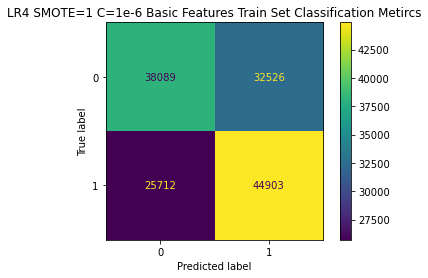

              precision    recall  f1-score   support

           0       0.60      0.54      0.57     70615
           1       0.58      0.64      0.61     70615

    accuracy                           0.59    141230
   macro avg       0.59      0.59      0.59    141230
weighted avg       0.59      0.59      0.59    141230



In [42]:
lr4=LogisticRegression(C=1e-6,random_state=42)
lr4.fit(X_train_resam,y_train_resam)
plot_confusion_matrix(lr4,X_train_resam,y_train_resam)
plt.title('LR4 SMOTE=1 C=1e-6 Basic Features Train Set Classification Metircs')
plt.show()
print(classification_report(y_train_resam,lr4.predict(X_train_resam)))

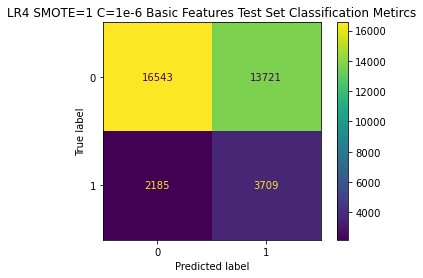

              precision    recall  f1-score   support

           0       0.88      0.55      0.68     30264
           1       0.21      0.63      0.32      5894

    accuracy                           0.56     36158
   macro avg       0.55      0.59      0.50     36158
weighted avg       0.77      0.56      0.62     36158



In [43]:
plot_confusion_matrix(lr4,X_test_sc,y_test)
plt.title('LR4 SMOTE=1 C=1e-6 Basic Features Test Set Classification Metircs')
plt.show()
print(classification_report(y_test,lr4.predict(X_test_sc)))

In [44]:
clf1=GridSearchCV(lr3,params,scoring='recall')
clf1.fit(X0_train_resam,y0_train_resam)
clf1.cv_results_

{'mean_fit_time': array([0.09779744, 0.1020339 , 0.18749089, 0.18044047, 0.25089145,
        0.58563919, 1.17426987, 1.19983768, 1.2676755 , 1.27219505,
        1.21482515, 1.26680479, 1.18016934]),
 'std_fit_time': array([0.00458557, 0.01018123, 0.01135279, 0.00553809, 0.0157828 ,
        0.04528236, 0.08124024, 0.03266363, 0.05693217, 0.08533639,
        0.02371506, 0.05217806, 0.11821311]),
 'mean_score_time': array([0.01603394, 0.01637702, 0.01667738, 0.01595087, 0.0154047 ,
        0.01559892, 0.01650887, 0.01657023, 0.01597834, 0.01653094,
        0.01598239, 0.01525078, 0.01552091]),
 'std_score_time': array([0.00087777, 0.0007507 , 0.00104441, 0.00062537, 0.0015258 ,
        0.00135541, 0.00063854, 0.00050302, 0.0009088 , 0.00046327,
        0.00035245, 0.00176155, 0.00204953]),
 'param_C': masked_array(data=[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1,
                    1, 10, 100.0, 1000.0, 10000.0],
              mask=[False, False, False, False, False, False, Fal

In [45]:
clf1.best_params_

{'C': 1e-06}

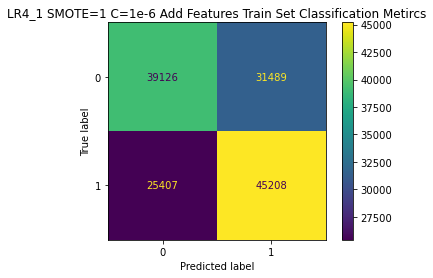

              precision    recall  f1-score   support

           0       0.61      0.55      0.58     70615
           1       0.59      0.64      0.61     70615

    accuracy                           0.60    141230
   macro avg       0.60      0.60      0.60    141230
weighted avg       0.60      0.60      0.60    141230



In [46]:
lr4_1=LogisticRegression(C=1e-6,random_state=42)
lr4_1.fit(X0_train_resam,y0_train_resam)
plot_confusion_matrix(lr4_1,X0_train_resam,y0_train_resam)
plt.title('LR4_1 SMOTE=1 C=1e-6 Add Features Train Set Classification Metircs')
plt.show()
print(classification_report(y0_train_resam,lr4_1.predict(X0_train_resam)))

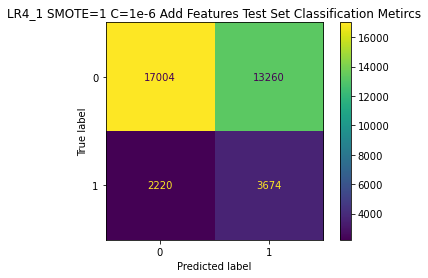

              precision    recall  f1-score   support

           0       0.88      0.56      0.69     30264
           1       0.22      0.62      0.32      5894

    accuracy                           0.57     36158
   macro avg       0.55      0.59      0.50     36158
weighted avg       0.78      0.57      0.63     36158



In [47]:
plot_confusion_matrix(lr4_1,X0_test_sc,y0_test)
plt.title('LR4_1 SMOTE=1 C=1e-6 Add Features Test Set Classification Metircs')
plt.show()
print(classification_report(y0_test,lr4_1.predict(X0_test_sc)))

Cross validation using manual codes

In [49]:
def cross_val (X_train, y_train, C, num_split=10):
    X_train = X_train.values
    y_train = y_train.values
    
    score_train_list = []
    score_val_list = []
    
    smote=SMOTE(sampling_strategy=1)
    X_train_resam,y_train_resam=smote.fit_resample(X_train,y_train)
    for train_index, valid_index in KFold(n_splits = num_split).split(X_train_resam):


        # train and validation splitting 
        X_train_fold, X_val_fold = X_train_resam[train_index], X_train_resam[valid_index]
        y_train_fold, y_val_fold = y_train_resam[train_index], y_train_resam[valid_index]

        #create/fit the Standard scaler on the train fold
        scaler = StandardScaler()
        X_tf_num_sc = scaler.fit_transform(X_train_fold[:,0:7])
        X_tf_sc=np.concatenate((X_tf_num_sc,X_train_fold[:,7:]),axis=1)
        # transform validation fold
        X_vld_num_sc = scaler.transform(X_val_fold[:,0:7])
        X_vld_sc = np.concatenate((X_vld_num_sc,X_val_fold[:,7:]),axis=1)
        # create/fit logistic regression
        logreg = LogisticRegression(C = C)
        logreg.fit(X_tf_sc, y_train_fold)
        
        # now how did we do in recall score?
        recall_train = recall_score(y_train_fold,logreg.predict(X_tf_sc))
        recall_val = recall_score(y_val_fold,logreg.predict(X_vld_sc))
        score_val_list.append(recall_train)
        score_train_list.append(recall_val)
    
    return {'C': C, 'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

In [50]:
def cross_validate (X_train, y_train, C, num_split=10):
    X_train = X_train.values
    y_train = y_train.values
    
    score_train_list = []
    score_val_list = []
    
    for train_index, valid_index in KFold(n_splits = num_split).split(X_train):


        # train and validation splitting 
        X_train_fold, X_val_fold = X_train[train_index], X_train[valid_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[valid_index]

        #create/fit the Standard scaler on the train fold
        scaler = StandardScaler()
        X_tf_num_sc = scaler.fit_transform(X_train_fold[:,0:7])
        X_tf_sc=np.concatenate((X_tf_num_sc,X_train_fold[:,7:]),axis=1)
        # transform validation fold
        X_vld_num_sc = scaler.transform(X_val_fold[:,0:7])
        X_vld_sc = np.concatenate((X_vld_num_sc,X_val_fold[:,7:]),axis=1)
        # create/fit logistic regression
        logreg = LogisticRegression(C = C)
        logreg.fit(X_tf_sc, y_train_fold)
        
        # now how did we do in recall score?
        recall_train = recall_score(y_train_fold,logreg.predict(X_tf_sc))
        recall_val = recall_score(y_val_fold,logreg.predict(X_vld_sc))
        score_val_list.append(recall_train)
        score_train_list.append(recall_val)
    
    return {'C': C, 'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

In [51]:
# empty dataframe
crossval_df = pd.DataFrame(columns = ['C', 'train', 'validation'])
# append results for each value of C
for C in [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,0.1,1,10,1e+2,1e+3,1e+4]:
    crossval_df = crossval_df.append(cross_val(X_train, y_train, C, 5),ignore_index=True)
crossval_df

,C,train,validation
0,1.000000e-08,0.600000,0.600000
1,1.000000e-07,0.600000,0.600000
2,1.000000e-06,0.600000,0.600000
3,1.000000e-05,0.593268,0.595133
4,1.000000e-04,0.564533,0.578588
5,1.000000e-03,0.592135,0.618218
6,1.000000e-02,0.573993,0.605261
7,1.000000e-01,0.565303,0.596763
8,1.000000e+00,0.564006,0.598387
9,1.000000e+01,0.563251,0.596673


Trying out C=1e-3 from manual cross-validation above, the results are less ideal than C=1e-6

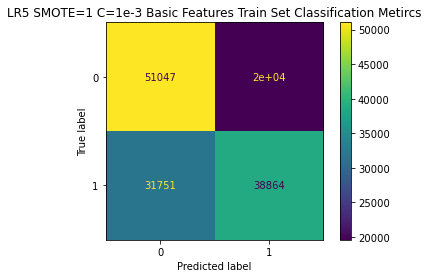

              precision    recall  f1-score   support

           0       0.62      0.72      0.67     70615
           1       0.67      0.55      0.60     70615

    accuracy                           0.64    141230
   macro avg       0.64      0.64      0.63    141230
weighted avg       0.64      0.64      0.63    141230



In [52]:
lr5=LogisticRegression(C=1e-3,random_state=42)
lr5.fit(X_train_resam,y_train_resam)
plot_confusion_matrix(lr5,X_train_resam,y_train_resam)
plt.title('LR5 SMOTE=1 C=1e-3 Basic Features Train Set Classification Metircs')
plt.show()
print(classification_report(y_train_resam,lr5.predict(X_train_resam)))

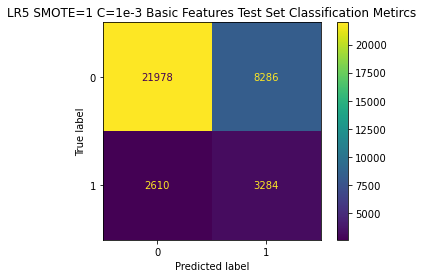

              precision    recall  f1-score   support

           0       0.89      0.73      0.80     30264
           1       0.28      0.56      0.38      5894

    accuracy                           0.70     36158
   macro avg       0.59      0.64      0.59     36158
weighted avg       0.79      0.70      0.73     36158



In [53]:
plot_confusion_matrix(lr5,X_test_sc,y_test)
plt.title('LR5 SMOTE=1 C=1e-3 Basic Features Test Set Classification Metircs')
plt.show()
print(classification_report(y_test,lr5.predict(X_test_sc)))

In [54]:
print('LR2 Model Co-efficients')
for index in range(0,9):
    print(X_train.columns[index],lr2.coef_[0,index])
print('----------------------')
print('LR4 Model Co-efficients')
for index in range(0,9):
    print(X_train.columns[index],lr4.coef_[0,index])

LR2 Model Co-efficients
loan_amount -0.17404664546313586
term -0.040506965758248074
property_value 0.3085968827376807
income -0.2398257810815296
Credit_Score 0.015926092479418667
LTV 0.29524337151072255
dtir1 0.09872691279986931
x0_nob/c -0.5645555427837431
x1_not_neg -0.9924584559075914
----------------------
LR4 Model Co-efficients
loan_amount -0.00320432812420273
term 0.0012393198414841003
property_value -0.003615104194428879
income -0.006998792550145676
Credit_Score 0.000468778022463608
LTV 0.00812062662970303
dtir1 0.0072246217321535995
x0_nob/c -0.003496807147015261
x1_not_neg -0.003562514782653789


In [55]:
print('LR3 Model Co-efficients')
for index in range(0,32):
    print(X0_train.columns[index],lr3.coef_[0,index])
print('----------------------')
print('LR4_1 Model Co-efficients')
for index in range(0,32):
    print(X0_train.columns[index],lr4_1.coef_[0,index])

LR3 Model Co-efficients
loan_amount -0.27237183498589085
term -0.02084580602153572
property_value 0.40363775288768905
income -0.29930872372800815
Credit_Score 0.025091067899972022
LTV 0.5395699761327084
dtir1 0.10435566382422046
x0_nob/c 0.8448216608529733
x1_not_neg -0.8765414121869848
x2_not_lpsm -2.7372114510275534
x3_not_int 0.056784217559784966
x0_ncf 0.7517727954551687
x1_pre -0.39169227213035085
x2_type2 1.347132477580676
x2_type3 -0.3153141520042419
x3_p2 1.0350058894171008
x3_p3 0.44670883825727314
x3_p4 0.35463271764386906
x4_l2 0.005869562791850193
x5_opc -0.22656572468921224
x6_pr -0.5381207876368294
x6_sr -0.17772797097536902
x7_2U 0.5042577844400237
x7_3U 0.5137197685578844
x7_4U -0.23503162725997342
x8_35-44 0.008402552521134268
x8_45-54 0.23826031823670654
x8_55-64 0.3614161866287635
x8_65-74 0.37283457518565405
x8_<25 -0.010749631382961651
x8_>74 0.42810331242610217
x9_North-East 0.012768745021558621
----------------------
LR4_1 Model Co-efficients
loan_amount -0.00330

#### Logistic Regression Iteration 4 Summary: after regularization tuning C, the model is improved by 0.01-0.02 in recall score compared to last iterations, no significant difference in basic feature model vs added feature model, though the basic feature model appears to be slightly better with regularization 

# Decision Trees

## Decision Tree Iteration 1

In [56]:
tree=DecisionTreeClassifier(random_state=42)

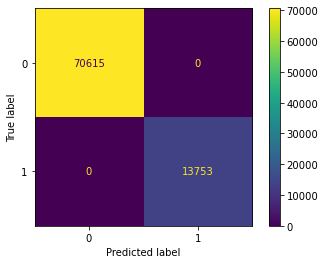

In [57]:
tree.fit(X_train_sc,y_train)
plot_confusion_matrix(tree,X_train_sc,y_train)

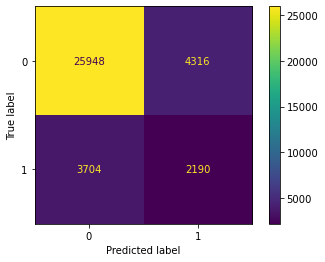

In [58]:
plot_confusion_matrix(tree,X_test_sc,y_test)

In [59]:
tree.get_depth()

51

Demonstrates clear overfitting issue as well as class imbalance, addressing both by tuning tree-depth and implementing SMOTE

## Decision Tree Iteration 2 Tuning Tree Depth and SMOTE

In [60]:
tree_params={'max_depth':[50,47,45,43,40,35,30,25,20,15,10,7,5,3]}
clf3=GridSearchCV(tree,tree_params,scoring='recall')
clf3.fit(X_train_sc,y_train)
clf3.cv_results_

{'mean_fit_time': array([0.74629288, 0.82347784, 0.77821803, 0.77871056, 0.80899963,
        0.73619723, 0.74750829, 0.63055067, 0.60368581, 0.45916996,
        0.32860265, 0.2318903 , 0.15806904, 0.0992847 ]),
 'std_fit_time': array([0.05956992, 0.07748289, 0.0537075 , 0.03173581, 0.0377455 ,
        0.03800183, 0.02814465, 0.03126905, 0.02581763, 0.0119562 ,
        0.0050444 , 0.00855904, 0.01439351, 0.00407461]),
 'mean_score_time': array([0.01537728, 0.01692677, 0.01469135, 0.01460333, 0.01642208,
        0.01268034, 0.01463141, 0.01311293, 0.01321297, 0.01222339,
        0.01095262, 0.0095243 , 0.00941353, 0.01019845]),
 'std_score_time': array([0.00349304, 0.00273413, 0.00270685, 0.0019114 , 0.00244372,
        0.00132779, 0.0024408 , 0.00170728, 0.00220226, 0.00182402,
        0.00199557, 0.00164264, 0.002039  , 0.00279012]),
 'param_max_depth': masked_array(data=[50, 47, 45, 43, 40, 35, 30, 25, 20, 15, 10, 7, 5, 3],
              mask=[False, False, False, False, False, False,

In [62]:
clf3.best_params_

{'max_depth': 43}

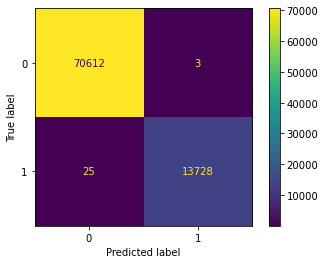

In [63]:
tree1=DecisionTreeClassifier(max_depth=43,random_state=42)
tree1.fit(X_train_sc,y_train)
plot_confusion_matrix(tree1,X_train_sc,y_train)

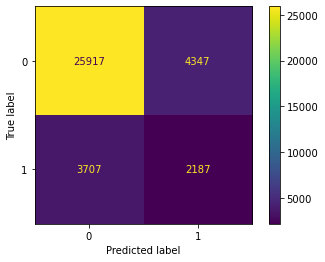

In [64]:
plot_confusion_matrix(tree1,X_test_sc,y_test)

In [65]:
for ratio in np.linspace(0.2,1,9):
    smote=SMOTE(sampling_strategy=ratio)
    X_train_resam,y_train_resam=smote.fit_resample(X_train_sc,y_train)
    tree=DecisionTreeClassifier(random_state=42)
    tree.fit(X_train_resam,y_train_resam)
    print(f"ratio {ratio:.2f} train recall score {recall_score(y_train_resam,tree.predict(X_train_resam)):.2f} test recall score {recall_score(y_test,tree.predict(X_test_sc)):.2f}")

ratio 0.20 train recall score 1.00 test recall score 0.38
ratio 0.30 train recall score 1.00 test recall score 0.39
ratio 0.40 train recall score 1.00 test recall score 0.40
ratio 0.50 train recall score 1.00 test recall score 0.40
ratio 0.60 train recall score 1.00 test recall score 0.40
ratio 0.70 train recall score 1.00 test recall score 0.40
ratio 0.80 train recall score 1.00 test recall score 0.40
ratio 0.90 train recall score 1.00 test recall score 0.40
ratio 1.00 train recall score 1.00 test recall score 0.41


even resampling still looks appropriate, so will keep implementing X_train_resam,y_train_resam as defined earlier

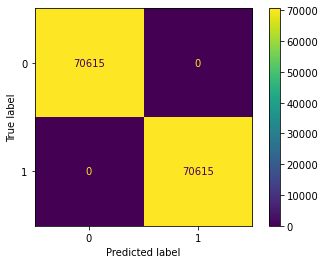

In [66]:
tree2=DecisionTreeClassifier(random_state=42)
tree2.fit(X_train_resam,y_train_resam)
plot_confusion_matrix(tree2,X_train_resam,y_train_resam)

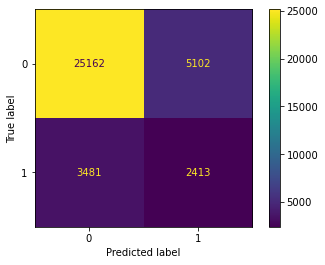

In [67]:
plot_confusion_matrix(tree2,X_test_sc,y_test)

In [68]:
tree2.get_depth()

66

In [69]:
tree_params={'max_depth':[65,63,60,55,50,45,40,35,30,25,20,18,15,10,7,5,4,3]}
clf4=GridSearchCV(tree2,tree_params,scoring='recall')
clf4.fit(X_train_resam,y_train_resam)
clf4.cv_results_

{'mean_fit_time': array([1.2782392 , 1.3368948 , 1.47083268, 1.42919145, 1.38172054,
        1.2796628 , 1.23949513, 1.29835186, 1.26820574, 1.10030131,
        0.97503371, 0.93380737, 0.81104741, 0.56410503, 0.43101707,
        0.33302946, 0.26781812, 0.2110847 ]),
 'std_fit_time': array([0.20167164, 0.14751583, 0.12196744, 0.22536408, 0.03801189,
        0.1090694 , 0.10126164, 0.12018444, 0.06141601, 0.05468574,
        0.0461266 , 0.07270177, 0.059152  , 0.02665752, 0.02681511,
        0.01854151, 0.01769121, 0.01592933]),
 'mean_score_time': array([0.01536036, 0.01819935, 0.01797142, 0.01851773, 0.01615963,
        0.01658669, 0.01550145, 0.01736097, 0.01529918, 0.01673698,
        0.01465373, 0.01380281, 0.01249065, 0.01119542, 0.01148853,
        0.01412482, 0.01021585, 0.01486888]),
 'std_score_time': array([0.00101164, 0.00462934, 0.00152104, 0.0027186 , 0.0008281 ,
        0.00128401, 0.0005208 , 0.00166031, 0.00148832, 0.00503178,
        0.003519  , 0.00133232, 0.00056541, 

In [71]:
clf4.best_estimator_

DecisionTreeClassifier(max_depth=65, random_state=42)

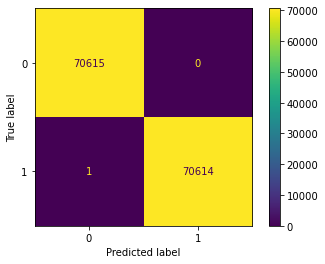

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70615
           1       1.00      1.00      1.00     70615

    accuracy                           1.00    141230
   macro avg       1.00      1.00      1.00    141230
weighted avg       1.00      1.00      1.00    141230



In [81]:
tree3=DecisionTreeClassifier(max_depth=65,random_state=42)
tree3.fit(X_train_resam,y_train_resam)
plot_confusion_matrix(tree3,X_train_resam,y_train_resam)
plt.show()
print(classification_report(y_train_resam,tree3.predict(X_train_resam)))

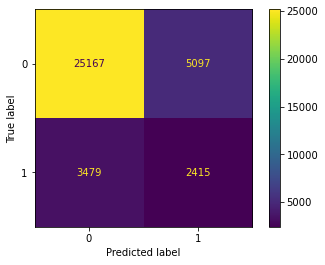

In [82]:
plot_confusion_matrix(tree3,X_test_sc,y_test)

In [83]:
tree_params={'max_depth':[20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3]}
clf5=GridSearchCV(tree2,tree_params,scoring='recall')
clf5.fit(X_train_resam,y_train_resam)
clf5.cv_results_

{'mean_fit_time': array([1.2423512 , 1.28878589, 1.21123047, 1.10220485, 1.06930685,
        0.96764679, 1.01851773, 0.94205828, 0.80373287, 0.7470902 ,
        0.67854042, 0.66341391, 0.55001807, 0.48202419, 0.47286167,
        0.37904363, 0.28656883, 0.22738805]),
 'std_fit_time': array([0.09198536, 0.03960538, 0.07101104, 0.08254596, 0.09317833,
        0.07073569, 0.05946489, 0.0649335 , 0.06757735, 0.07865291,
        0.07746266, 0.04414079, 0.03574497, 0.0283708 , 0.046176  ,
        0.01820297, 0.01588426, 0.00952238]),
 'mean_score_time': array([0.01748457, 0.01898069, 0.01986241, 0.01967659, 0.03959165,
        0.0156909 , 0.01694741, 0.01676159, 0.01445637, 0.01381159,
        0.0133544 , 0.01439204, 0.01519256, 0.0130342 , 0.01526484,
        0.01475086, 0.01340528, 0.01275234]),
 'std_score_time': array([0.00432993, 0.00342179, 0.00290243, 0.00301525, 0.04309279,
        0.00186486, 0.00294424, 0.00341378, 0.00270138, 0.00205578,
        0.0029933 , 0.00251435, 0.0040955 , 

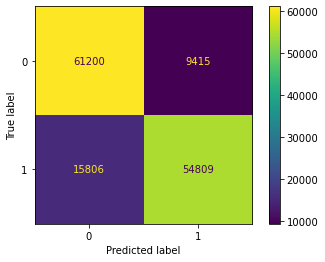

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     70615
           1       0.85      0.78      0.81     70615

    accuracy                           0.82    141230
   macro avg       0.82      0.82      0.82    141230
weighted avg       0.82      0.82      0.82    141230



In [84]:
tree4=DecisionTreeClassifier(max_depth=19,random_state=42)
tree4.fit(X_train_resam,y_train_resam)
plot_confusion_matrix(tree4,X_train_resam,y_train_resam)
plt.show()
print(classification_report(y_train_resam,tree4.predict(X_train_resam)))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85     30264
           1       0.34      0.48      0.40      5894

    accuracy                           0.76     36158
   macro avg       0.61      0.65      0.62     36158
weighted avg       0.80      0.76      0.78     36158



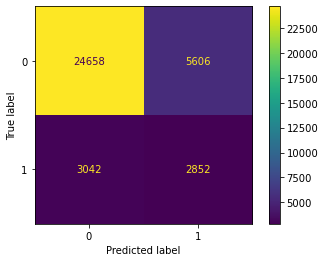

In [85]:
plot_confusion_matrix(tree4,X_test_sc,y_test)
print(classification_report(y_test,tree4.predict(X_test_sc)))

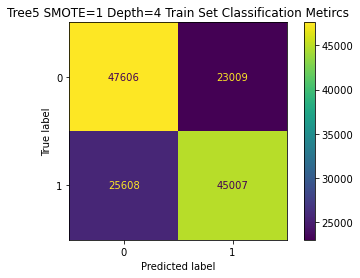

              precision    recall  f1-score   support

           0       0.65      0.67      0.66     70615
           1       0.66      0.64      0.65     70615

    accuracy                           0.66    141230
   macro avg       0.66      0.66      0.66    141230
weighted avg       0.66      0.66      0.66    141230



In [120]:
tree5=DecisionTreeClassifier(max_depth=4,random_state=42)
tree5.fit(X_train_resam,y_train_resam)
plot_confusion_matrix(tree5,X_train_resam,y_train_resam)
plt.title('Tree5 SMOTE=1 Depth=4 Train Set Classification Metircs')
plt.show()
print(classification_report(y_train_resam,tree5.predict(X_train_resam)))

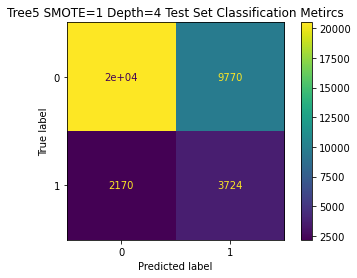

              precision    recall  f1-score   support

           0       0.90      0.68      0.77     30264
           1       0.28      0.63      0.38      5894

    accuracy                           0.67     36158
   macro avg       0.59      0.65      0.58     36158
weighted avg       0.80      0.67      0.71     36158



In [121]:
plot_confusion_matrix(tree5,X_test_sc,y_test)
plt.title('Tree5 SMOTE=1 Depth=4 Test Set Classification Metircs')
plt.show()
print(classification_report(y_test,tree5.predict(X_test_sc)))

In [122]:
tree5.feature_importances_
print('Tree5 Model Feature Importances')
print('----------------------')
for index in range(0,11):
    print(X_train.columns[index],tree5.feature_importances_[index])

Tree5 Model Feature Importances
----------------------
loan_amount 0.0036713868743268614
term 0.0
property_value 0.0
income 0.1821925336202967
Credit_Score 0.0
LTV 0.02326401034834707
dtir1 0.46097922302517275
x0_nob/c 0.025374839525388965
x1_not_neg 0.16523577568005526
x2_not_lpsm 0.1392822309264122
x3_not_int 0.0


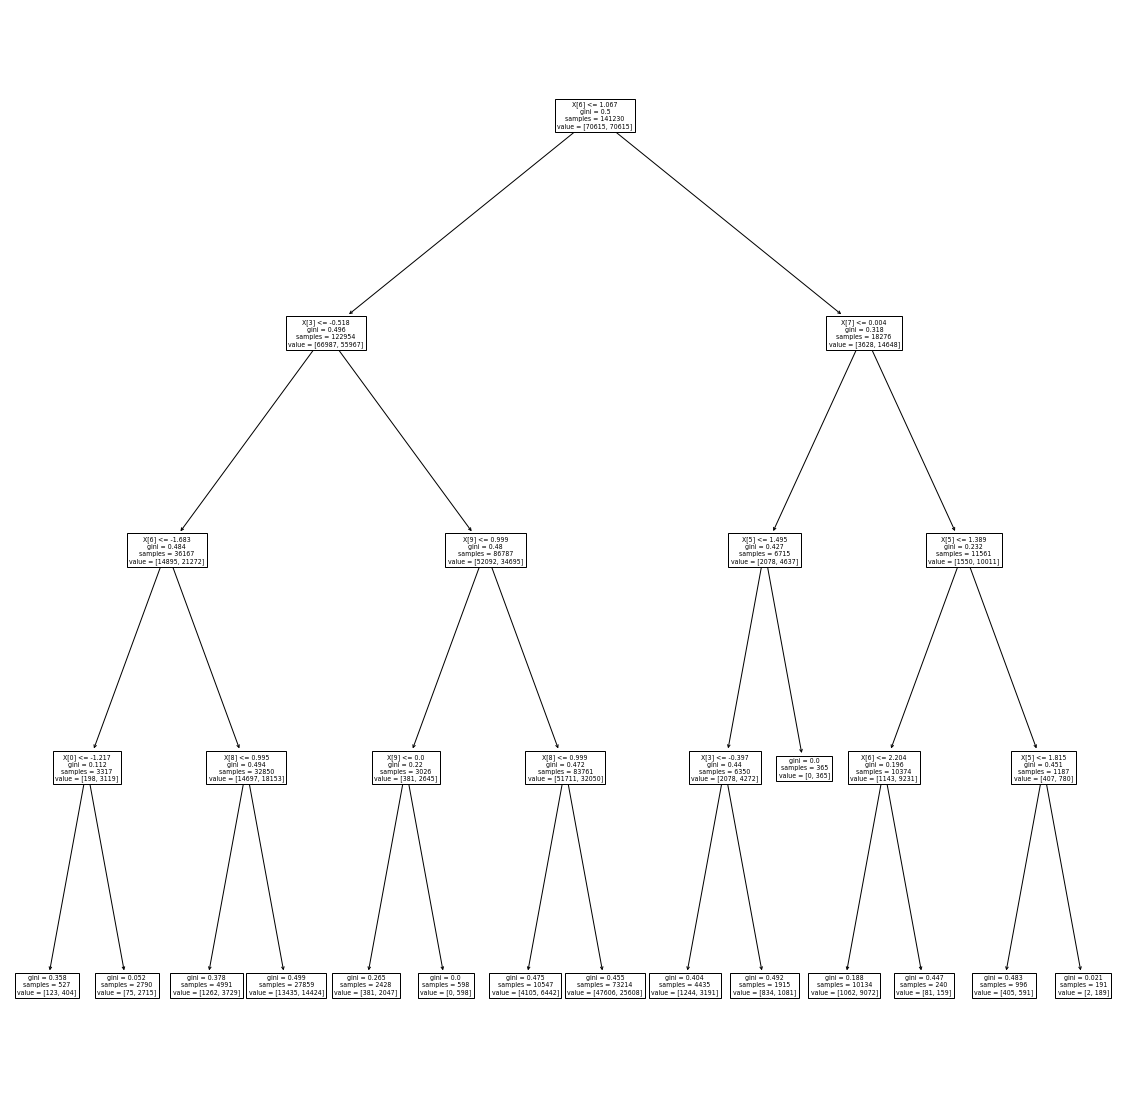

In [123]:
f,ax=plt.subplots(figsize=(20,20))
plot_tree(tree5,ax=ax)
plt.show()

The last iteration of the decision tree appears to be best model so far with max depth = 4 which results in the best stable performance in test set. Note that randomization in resampling could affect model test results and we have achieved higher recall score previously when running code without random state in SMOTE. But overall, this decision tree model is stabalized with the same if not higher recall score than the best logisitic regression model and still considered the better model with all factors considered. 

# K-Nearest Neighbors

Build KNN model, determine best-k, assess recall score

In [124]:
knn = KNeighborsClassifier()

parameters = {'n_neighbors': range(1, 21)}
clf = GridSearchCV(knn, parameters, cv=5, scoring='recall')
clf.fit(X_train_sc, y_train)

best_k = clf.best_params_['n_neighbors']
print("Best k found:", best_k)

Best k found: 1


Accuracy: 0.7830632225233697
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     30264
           1       0.32      0.30      0.31      5894

    accuracy                           0.78     36158
   macro avg       0.59      0.59      0.59     36158
weighted avg       0.78      0.78      0.78     36158



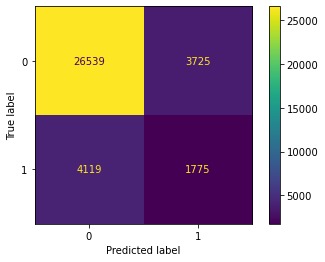

In [126]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_sc, y_train)
y_pred = knn_best.predict(X_test_sc)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(plot_confusion_matrix(knn_best,X_test_sc,y_test))

Dataset is imbalanced, need to correct with SMOTE

In [128]:
smote=SMOTE(sampling_strategy=1)
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    100879
1     19647
Name: Status, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

0    70615
1    70615
Name: Status, dtype: int64


In [130]:
smote_model = knn_best.fit(X_train_resampled, y_train_resampled)

In [138]:
plt.figure(figsize=(12,10))
for n, ratio in enumerate(ratios):
    # Fit a model using SMOTE with the current ratio
    smote = SMOTE(sampling_strategy=ratio)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    smote_model = KNeighborsClassifier(n_neighbors=best_k).fit(X_train_resampled, y_train_resampled)
    
    print(f"Training with SMOTE ratio {names[n]}, n_neighbors = {best_k}")
    print(f"Resampled class distribution: {pd.Series(y_train_resampled).value_counts()}")

    # Predict probabilities and classes
    y_proba = smote_model.predict_proba(X_test)[:, 1]
    y_pred = smote_model.predict(X_test)


    # Calculate and print Recall
    recall = recall_score(y_test, y_pred)
    print(f'Recall for {names[n]}: {recall}')
    print('-------------------------------------------------------------------------------------')


Training with SMOTE ratio 0.33, n_neighbors = 1
Resampled class distribution: 0    70615
1    23302
Name: Status, dtype: int64
Recall for 0.33: 0.2643366135052596
-------------------------------------------------------------------------------------
Training with SMOTE ratio 0.5, n_neighbors = 1
Resampled class distribution: 0    70615
1    35307
Name: Status, dtype: int64
Recall for 0.5: 0.3036986766202918
-------------------------------------------------------------------------------------
Training with SMOTE ratio 0.7, n_neighbors = 1
Resampled class distribution: 0    70615
1    49430
Name: Status, dtype: int64
Recall for 0.7: 0.332032575500509
-------------------------------------------------------------------------------------
Training with SMOTE ratio even, n_neighbors = 1
Resampled class distribution: 0    70615
1    70615
Name: Status, dtype: int64
Recall for even: 0.37139463861554123
-------------------------------------------------------------------------------------


<Figure size 864x720 with 0 Axes>

Recall score is low. Not an effective model.

# Conclusions and Next Steps

The best model from our various iteration was decision tree with SMOTE resampling strategy = 1, which is stalized to tree depth = 4 with maximized 0.63 recall test score. We believe this would be the best model for the bank to use for their default monitoring efforts to maximize the band-width covering the most loans likely defaulting. The next step to improve our model is to get more data with default loans to improve on precision score and other metrics.  